In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split

import picograd as pg
from picograd import Module, Linear, relu, log_softmax, nll_loss, SGD, AdamW, no_grad, train

In [3]:
from sklearn import datasets

mnist = datasets.fetch_openml(name='mnist_784')

In [4]:
X = mnist.data.to_numpy().astype(np.float64)
X = X / 255.
y = mnist.target.to_numpy().astype(np.int64)

train_X, test_X, train_y, test_y = train_test_split(
    X, y, train_size=10000, test_size=10000, shuffle=False)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((10000, 784), (10000, 784), (10000,), (10000,))

In [5]:
class Model(Module):
    def __init__(self):
        self.fc1 = Linear(784, 512)
        self.fc2 = Linear(512, 10)

    def __call__(self, x):
        x = self.fc1(x)
        x = relu(x)
        x = self.fc2(x)
        return log_softmax(x)

train_kwargs = dict(
    batch_size=50,
    max_epochs=10,
    log_iters=10,
    early_stopping_delta=1e-3,
    early_stopping_patience=3)

acc = lambda y_pred, y: np.mean(np.argmax(y_pred.view(np.ndarray), axis=1) == y.view(np.ndarray))

## Stochastic Gradient Descent (SGD)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Total epochs = 10 | elapsed = 98.67s | train loss = 11.488414049657493 | train acc = 0.8154000000000003 | val loss = 14.538970280264973 | val acc = 0.7719


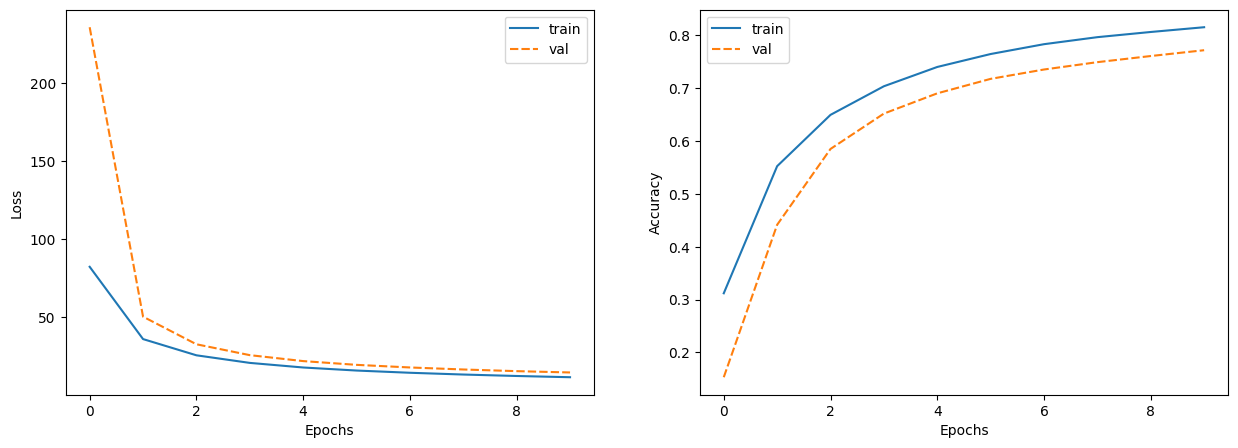

In [6]:
np.random.seed(0)
model0 = Model()
optim0 = SGD(model0.parameters(), lr=0.1)
train(model0, train_X, train_y, nll_loss, acc, optim0, X_val=test_X, y_val=test_y, **train_kwargs)

## SGD with momentum

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Total epochs = 10 | elapsed = 102.60s | train loss = 7.465280263408531 | train acc = 0.8609000000000002 | val loss = 10.887582321561752 | val acc = 0.8136


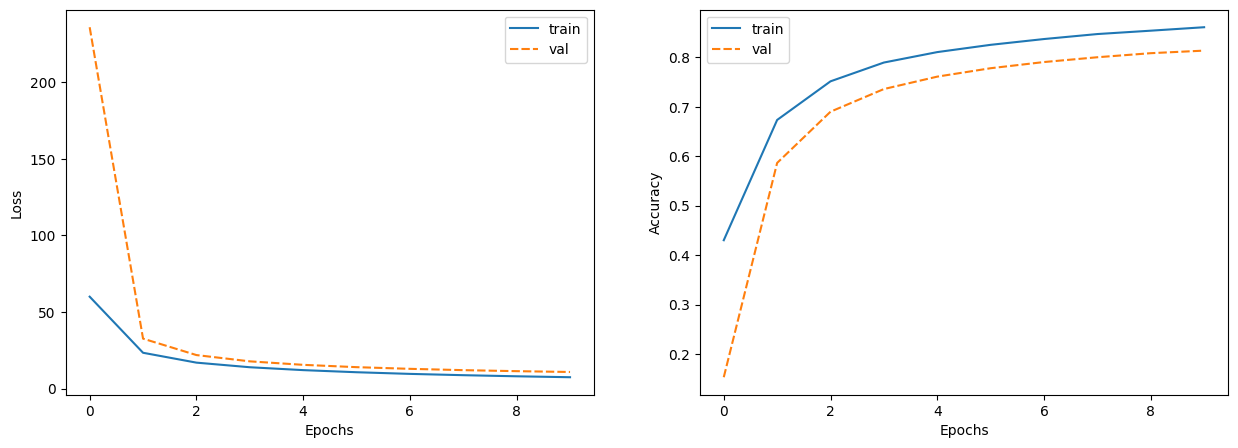

In [7]:
np.random.seed(0)
model1 = Model()
optim1 = SGD(model1.parameters(), lr=0.1, momentum=0.99)
train(model1, train_X, train_y, nll_loss, acc, optim1, X_val=test_X, y_val=test_y, **train_kwargs)

## AdamW

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Total epochs = 10 | elapsed = 108.47s | train loss = 0.3709960252146648 | train acc = 0.983299999999999 | val loss = 3.4938169819261313 | val acc = 0.9286


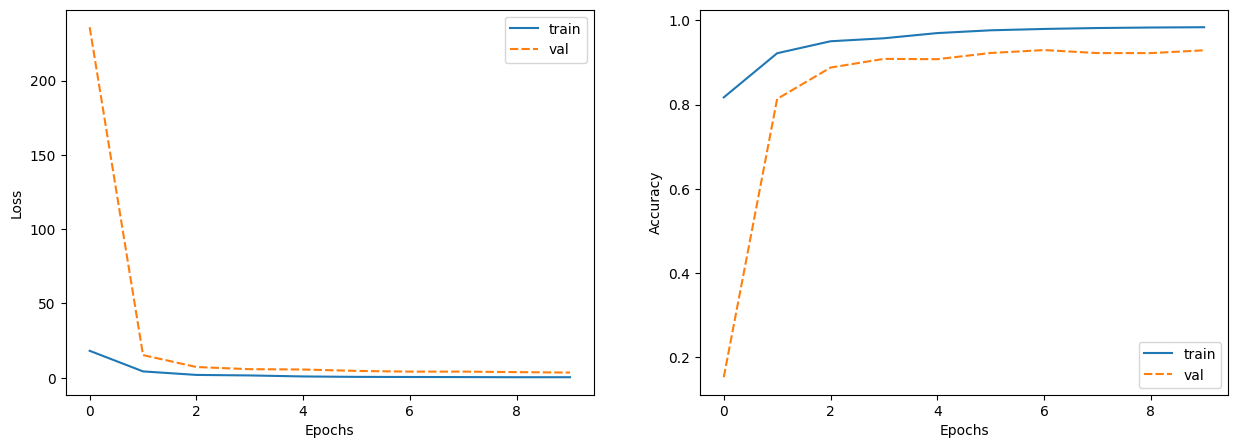

In [8]:
np.random.seed(0)
model2 = Model()
optim2 = AdamW(model2.parameters(), lr=0.01)
train(model2, train_X, train_y, nll_loss, acc, optim2, X_val=test_X, y_val=test_y, **train_kwargs)